In [1]:
from Shared_Tool.Image_Load_IAM import IAM_Img_Handler
from OCR_classifiers.HOG_SVM.HOG_SVM import Classifier_HOG_SVM
import numpy as np

# Test set (10 pictures)

In [2]:
num_img = 10
IAM_handler = IAM_Img_Handler()
X, y = IAM_handler.load_imgs(num_img=num_img)

D:\Projects\OCR\Shared_Tool\Image_Load_IAM.py:29: ConversionWarning: Some errors were detected !
    Line #23 (got 10 columns instead of 9)
    Line #48 (got 10 columns instead of 9)
    Line #75 (got 10 columns instead of 9)
    Line #100 (got 10 columns instead of 9)
    Line #118 (got 10 columns instead of 9)
    Line #136 (got 10 columns instead of 9)
    Line #199 (got 10 columns instead of 9)
    Line #218 (got 10 columns instead of 9)
    Line #279 (got 10 columns instead of 9)
    Line #297 (got 10 columns instead of 9)
    Line #365 (got 8 columns instead of 9)
    Line #493 (got 8 columns instead of 9)
    Line #1427 (got 10 columns instead of 9)
    Line #1512 (got 10 columns instead of 9)
    Line #1598 (got 10 columns instead of 9)
    Line #1930 (got 8 columns instead of 9)
    Line #2324 (got 8 columns instead of 9)
    Line #2720 (got 8 columns instead of 9)
    Line #3028 (got 8 columns instead of 9)
    Line #3331 (got 10 columns instead of 9)
    Line #3395 (got 10 c

Data loaded and deleted data with 'err' flag, the size of valid data is  96365


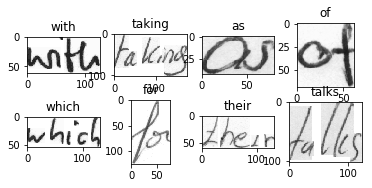

In [3]:
IAM_handler.show_8_pic( )

## Use 8 pictures as training

In [4]:
model_SVM = Classifier_HOG_SVM(imgs=X, meta=y, num_train=8, num_val=2)

0  images has been preprocessed
Shape of gradient images is  (10, 256, 512)
The shape of the training, validation and testing data is  (8, 756) (2, 756) (2, 756)
It takes  0.1941235065460205  seconds to initiate this model


D:\Anaconda501\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


## Show 3 random pictures (orignal and histogram) in one figure
### It is not very clear on plot but very clear with cv2.imshow()

We selected the following images [7 4 5]


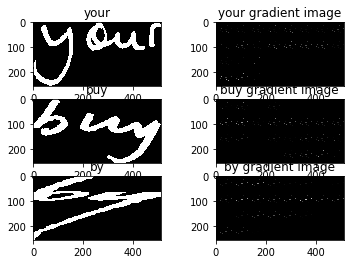

In [5]:
model_SVM.show_random_histogram()

## Train the model with dummy data

In [6]:
model_SVM.train()

It takes  0.0010008811950683594  seconds to train the model


### We find that the result is overfitted but this is what we want for now because we are using dummy data. 

In [7]:
y = model_SVM.predict(model_SVM.X_train)
print("The label of training set is ", model_SVM.y_train)
print("The predicted label of training set is ", y)


The label of training set is  [ 6.  3.  4.  5.  2.  1.  0.  7.]
The predicted label of training set is  [ 6.  3.  4.  5.  2.  1.  0.  7.]


## Now let's try something more insteresting, we load 1000 images
#### With 800 for training, 200 for validation and 200 for testing

In [8]:
num_img = 1000
IAM_handler = IAM_Img_Handler()
X, y = IAM_handler.load_imgs(num_img=num_img)

D:\Projects\OCR\Shared_Tool\Image_Load_IAM.py:29: ConversionWarning: Some errors were detected !
    Line #23 (got 10 columns instead of 9)
    Line #48 (got 10 columns instead of 9)
    Line #75 (got 10 columns instead of 9)
    Line #100 (got 10 columns instead of 9)
    Line #118 (got 10 columns instead of 9)
    Line #136 (got 10 columns instead of 9)
    Line #199 (got 10 columns instead of 9)
    Line #218 (got 10 columns instead of 9)
    Line #279 (got 10 columns instead of 9)
    Line #297 (got 10 columns instead of 9)
    Line #365 (got 8 columns instead of 9)
    Line #493 (got 8 columns instead of 9)
    Line #1427 (got 10 columns instead of 9)
    Line #1512 (got 10 columns instead of 9)
    Line #1598 (got 10 columns instead of 9)
    Line #1930 (got 8 columns instead of 9)
    Line #2324 (got 8 columns instead of 9)
    Line #2720 (got 8 columns instead of 9)
    Line #3028 (got 8 columns instead of 9)
    Line #3331 (got 10 columns instead of 9)
    Line #3395 (got 10 c

Data loaded and deleted data with 'err' flag, the size of valid data is  96365


In [9]:
model_SVM = Classifier_HOG_SVM(imgs=X, meta=y, num_train=800, num_val=200, pixel_per_cell=16)

D:\Anaconda501\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


0  images has been preprocessed
100  images has been preprocessed
200  images has been preprocessed
300  images has been preprocessed
400  images has been preprocessed
500  images has been preprocessed
600  images has been preprocessed
700  images has been preprocessed
800  images has been preprocessed
900  images has been preprocessed
Shape of gradient images is  (1000, 256, 512)
The shape of the training, validation and testing data is  (800, 16740) (200, 16740) (200, 16740)
It takes  93.49289464950562  seconds to initiate this model


In [10]:
model_SVM.train()

It takes  48.534249782562256  seconds to train the model


## The model overfit the data again, 100%, we don't even need to do validation lol
#### I think that's because the dimension is 16720 and number of data is 800. To seperate 800 point in 16720 position is super easy

In [11]:
y_train_pred = model_SVM.predict(model_SVM.X_train)
print("The accuracy of this prediction is ", np.sum(y_train_pred == model_SVM.y_train) / len(y_train_pred))

The accuracy of this prediction is  1.0


## So what we want is to decrease the dimension of the input (histogram)
#### It is still over fitting because, still, the dimension is too high too 

In [13]:
model_SVM = Classifier_HOG_SVM(imgs=X, meta=y, num_train=800, num_val=200, pixel_per_cell=32)
model_SVM.train()
y_train_pred = model_SVM.predict(model_SVM.X_train)
print("The accuracy of this prediction is ", np.sum(y_train_pred == model_SVM.y_train) / len(y_train_pred))

D:\Anaconda501\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


0  images has been preprocessed
100  images has been preprocessed
200  images has been preprocessed
300  images has been preprocessed
400  images has been preprocessed
500  images has been preprocessed
600  images has been preprocessed
700  images has been preprocessed
800  images has been preprocessed
900  images has been preprocessed
Shape of gradient images is  (1000, 256, 512)
The shape of the training, validation and testing data is  (800, 3780) (200, 3780) (200, 3780)
It takes  35.22557997703552  seconds to initiate this model
It takes  10.345530986785889  seconds to train the model
The accuracy of this prediction is  1.0


## Let's try it one more time (I promise, the last one!)

In [18]:
model_SVM = Classifier_HOG_SVM(imgs=X, meta=y, num_train=800, num_val=200, pixel_per_cell=64)
model_SVM.train()
y_train_pred = model_SVM.predict(model_SVM.X_train)
print("The accuracy of this prediction is ", np.sum(y_train_pred == model_SVM.y_train) / len(y_train_pred))

D:\Anaconda501\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


0  images has been preprocessed
100  images has been preprocessed
200  images has been preprocessed
300  images has been preprocessed
400  images has been preprocessed
500  images has been preprocessed
600  images has been preprocessed
700  images has been preprocessed
800  images has been preprocessed
900  images has been preprocessed
Shape of gradient images is  (1000, 256, 512)
The shape of the training, validation and testing data is  (800, 756) (200, 756) (200, 756)
It takes  20.480870485305786  seconds to initiate this model
It takes  1.8373425006866455  seconds to train the model
The accuracy of this prediction is  0.87875


#### Yaaaaaay! Finally not 100% any more! (That's what I always tell myself after exams)
## Now let's try it on validation set and test set

In [19]:
y_val_pred = model_SVM.predict(model_SVM.X_val)
print("The accuracy of this prediction on validation data set is ", np.sum(y_val_pred == model_SVM.y_val) / len(y_val_pred))
y_test_pred = model_SVM.predict(model_SVM.X_test)
print("The accuracy of this prediction on test data set is ", np.sum(y_test_pred == model_SVM.y_test) / len(y_test_pred))

The accuracy of this prediction on validation data set is  0.865
The accuracy of this prediction on validation data set is  0.22


#### Attention please! This a typical overfitting case. We need to customize hyperparameters and  do cross-validation  